<a href="https://colab.research.google.com/github/jerrvonewing/machine-learning-a-to-z/blob/main/regression/05-support-vector-regression/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
# Reshape to be a vertical 2D array as StandardScaler class expects this shape
y = y.reshape(len(y),1)     # 10 rows, 1 column
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

# StandardScaler for x
scx = StandardScaler()
# StandardScaler for y
scy = StandardScaler()

# Gets the standard deviation and mean of the dataset, and transforms the data using Standardization
x = scx.fit_transform(x)
y = scy.fit_transform(y)

In [8]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR

# Create SVR model
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

# Train SVR on entire dataset
regressor.fit(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [11]:
# Predict results using our Scaler object
# Reverse scaling for the result using the inverse_transform method
scy.inverse_transform(regressor.predict(scx.transform([[6.5]])).reshape(-1,1))  # Reshape to avoid format error

array([[170370.0204065]])

## Visualizing the SVR results

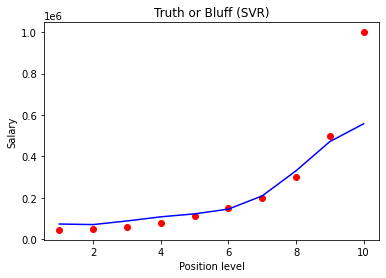

In [14]:
# Plot the SVR Regression 
plt.scatter(scx.inverse_transform(x), scy.inverse_transform(y), color = 'red')
plt.plot(scx.inverse_transform(x), scy.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualizing the SVR results (for higher resolution and smoother curve)

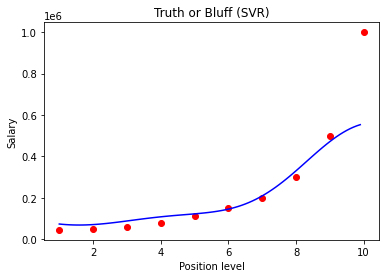

In [15]:
X_grid = np.arange(min(scx.inverse_transform(x)), max(scx.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scx.inverse_transform(x), scy.inverse_transform(y), color = 'red')
plt.plot(X_grid, scy.inverse_transform(regressor.predict(scx.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()